In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as RMSE
import seaborn as sns

In [ ]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# cols = ['pregnancies',	'diastolic',	'triceps',	'insulin',	'bmi',	'dpf',	'age']
col = ['total_bill']
X = df[col]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model_all = LinearRegression()

model_all.fit(X_train, y_train)

y_pred = model_all.predict(X_test)

RMSE(y_test, y_pred)

np.float64(0.933372676777071)

In [ ]:
import numpy as np

In [ ]:
y_dummy = df['tip'].mean()
y_dummy
dummy_pred = np.full(y_test.shape[0], y_dummy)
dummy_pred

array([2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869, 2.99827869,
       2.99827869, 2.99827869, 2.99827869, 2.99827869])

In [ ]:
print(RMSE(y_test, y_pred))
print(RMSE(y_test, dummy_pred))

0.933372676777071
1.3159518704501307


<Axes: xlabel='tip'>

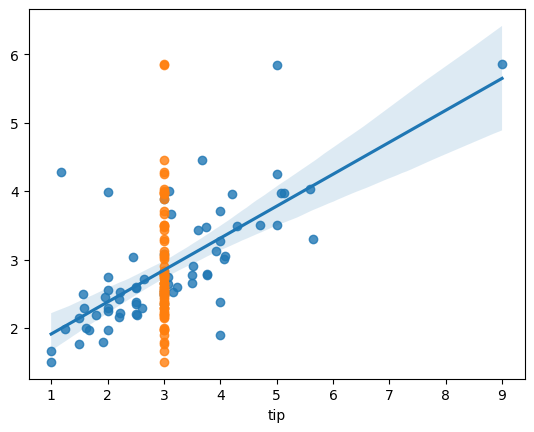

In [ ]:
sns.regplot(x=y_test, y=y_pred)
sns.regplot(x=dummy_pred, y=y_pred)

<Axes: xlabel='total_bill', ylabel='tip'>

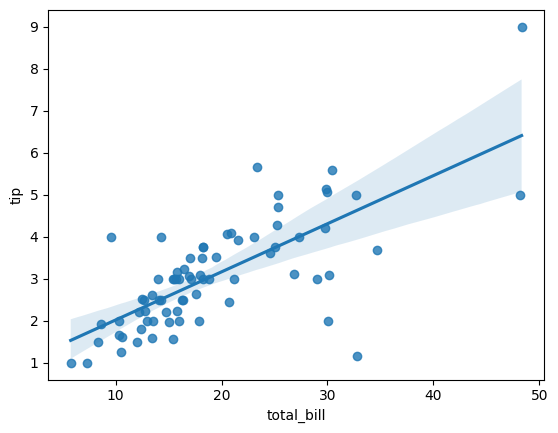

In [ ]:
sns.regplot(x=X_test, y=y_test)


In [ ]:
y_test

64     2.64
63     3.76
55     3.51
111    1.00
225    2.50
       ... 
90     3.00
101    3.00
75     1.25
4      3.61
109    4.00
Name: tip, Length: 74, dtype: float64

In [ ]:
X_test

,total_bill
64,17.59
63,18.29
55,19.49
111,7.25
225,16.27
...,...
90,28.97
101,15.38
75,10.51
4,24.59


In [ ]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

- bmi = 30.98
- bmi+age = 30.54
- bmi+age+diastolic = 30.50

`y= a1x1 + a2x2 + a3x3 +b`

In [ ]:
model_all.coef_

array([0.08733629, 6.14328321])

In [ ]:
# X.hist()

from sklearn.preprocessing import StandardScaler
import seaborn as sns
sc = StandardScaler()
df['insulin_scaled'] = sc.fit_transform(df[['insulin']])
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes,insulin_scaled
0,6,148,72,35,0,33.6,0.627,50,1,-0.692891
1,1,85,66,29,0,26.6,0.351,31,0,-0.692891
2,8,183,64,0,0,23.3,0.672,32,1,-0.692891
3,1,89,66,23,94,28.1,0.167,21,0,0.123302
4,0,137,40,35,168,43.1,2.288,33,1,0.765836
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.870031
764,2,122,70,27,0,36.8,0.340,27,0,-0.692891
765,5,121,72,23,112,26.2,0.245,30,0,0.279594
766,1,126,60,0,0,30.1,0.349,47,1,-0.692891


In [ ]:
# cols = ['pregnancies',	'diastolic',	'triceps',	'insulin',	'bmi',	'dpf',	'age']
col = ['insulin_scaled', 'dpf']
X = df[col]
y = df['glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred = model_all.predict(X_test)
RMSE(y_test, y_pred)

np.float64(29.45811073122816)

In [ ]:
model_all.coef_

array([10.05842884,  6.14328321])

In [ ]:
model_all.intercept_

np.float64(118.20273314958268)

In [ ]:
df[['diastolic', 'glucose', 'bmi']].corr()

,diastolic,glucose,bmi
diastolic,1.000000,0.152590,0.281805
glucose,0.152590,1.000000,0.221071
bmi,0.281805,0.221071,1.000000
